Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Wrangle ML datasets

- [ ] Continue to clean and explore your data. 
- [ ] For the evaluation metric you chose, what score would you get just by guessing?
- [ ] Can you make a fast, first model that beats guessing?

**We recommend that you use your portfolio project dataset for all assignments this sprint.**

**But if you aren't ready yet, or you want more practice, then use the New York City property sales dataset for today's assignment.** Follow the instructions below, to just keep a subset for the Tribeca neighborhood, and remove outliers or dirty data. [Here's a video walkthrough](https://youtu.be/pPWFw8UtBVg?t=584) you can refer to if you get stuck or want hints!

- Data Source: [NYC OpenData: NYC Citywide Rolling Calendar Sales](https://data.cityofnewyork.us/dataset/NYC-Citywide-Rolling-Calendar-Sales/usep-8jbt)
- Glossary: [NYC Department of Finance: Rolling Sales Data](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page)

In [1]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [2]:
# Read New York City property sales data
import pandas as pd
df = pd.read_csv(DATA_PATH+'condos/NYC_Citywide_Rolling_Calendar_Sales.csv')

Your code starts here:

In [3]:
# Change column names: replace spaces with underscores
df.columns = [s.replace(" ", "_") for s in df.columns]

In [4]:
# Get Pandas Profiling Report
import pandas_profiling

df.profile_report()

In [60]:
# Keep just the subset of data for the Tribeca neighborhood
# Check how many rows you have now. (Should go down from > 20k rows to 146)
tribeca_df = df[df["NEIGHBORHOOD"] == "TRIBECA"].copy()
tribeca_df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,...,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
220,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,222,1013,NaN,R4,"181 HUDSON STREET, 6D",6D,...,1.0,0.0,1.0,"7,878",1840.0,1909.0,2,R4,"$ 2,800,000",01/03/2019
763,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,16,9022,NaN,R4,"10 LITTLE WEST STREET, 19A",19A,...,1.0,0.0,1.0,0,1759.0,0.0,2,R4,"$ 2,650,000",01/07/2019
996,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,212,1404,NaN,R4,"11 BEACH STREET, 1D",1D,...,1.0,0.0,1.0,"11,213",2651.0,1900.0,2,R4,$ - 0,01/08/2019
1276,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,16,1441,NaN,R4,"30 LITTLE WEST STREET, 7G",7G,...,1.0,0.0,1.0,0,1190.0,2005.0,2,R4,"$ 1,005,000",01/09/2019
1542,1,TRIBECA,02 TWO FAMILY DWELLINGS,1,132,26,NaN,S2,"75 WARREN STREET, XX",NaN,...,2.0,1.0,3.0,"1,819",10117.0,1905.0,1,S2,"$ 12,950,000",01/10/2019


In [61]:
assert tribeca_df.shape == (146, 21)

In [62]:
# Q. What's the date range of these property sales in Tribeca?
tribeca_df["SALE_DATE"] = pd.to_datetime(tribeca_df["SALE_DATE"])

In [63]:
earliest = tribeca_df["SALE_DATE"].min()
latest = tribeca_df["SALE_DATE"].max()

print(earliest, latest)

2019-01-03 00:00:00 2019-04-30 00:00:00


In [64]:
# The Pandas Profiling Report showed that SALE_PRICE was read as strings
# Convert it to integers
import numpy as np

tribeca_df["SALE_PRICE"]  = tribeca_df["SALE_PRICE"].str.strip("$").str.replace(",", "").str.replace(" ", "").astype(np.int64)

In [65]:
# Q. What is the maximum SALE_PRICE in this dataset?
most_expensive = tribeca_df["SALE_PRICE"].max()
most_expensive

260000000

In [66]:
# Look at the row with the max SALE_PRICE
tribeca_df[tribeca_df["SALE_PRICE"] == most_expensive]

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,...,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
6499,1,TRIBECA,08 RENTALS - ELEVATOR APARTMENTS,2,224,1,NaN,D8,34 DESBROSSES STREET,NaN,...,283.0,3.0,286.0,"36,858",305542.0,2007.0,2,D8,260000000,2019-02-01


In [67]:
# Get value counts of TOTAL_UNITS
# Q. How many property sales were for multiple units?
tribeca_df["TOTAL_UNITS"].value_counts()

1.0      131
0.0       11
5.0        1
286.0      1
8.0        1
3.0        1
Name: TOTAL_UNITS, dtype: int64

In [68]:
sum(tribeca_df["TOTAL_UNITS"] > 1)

4

In [69]:
# Keep only the single units
tribeca_df = tribeca_df[tribeca_df["TOTAL_UNITS"] == 1].copy()
tribeca_df.shape

(131, 21)

In [54]:
# Q. Now what is the max sales price? How many square feet does it have?

max_price = tribeca_df["SALE_PRICE"].max()
max_price

39285000

In [55]:
# Q. How often did $0 sales occur in this subset of the data?

# There's a glossary here: 
# https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page

# It says:
# A $0 sale indicates that there was a transfer of ownership without a 
# cash consideration. There can be a number of reasons for a $0 sale including 
# transfers of ownership from parents to children. 

(tribeca_df["SALE_PRICE"] == 0).sum()

15

In [56]:
# Look at property sales for > 5,000 square feet
# Q. What is the highest square footage you see?
tribeca_df[tribeca_df["GROSS_SQUARE_FEET"] > 5000]

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,...,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
9236,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,223,1144,NaN,R4,"70 VESTRY STREET, 12S",12S,...,1.0,0.0,1.0,0,8346.0,2016.0,2,R4,39285000,2019-02-15
10487,1,TRIBECA,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,179,1607,NaN,R1,"24 LEONARD ST, PH W",PH W,...,1.0,0.0,1.0,"9,983",39567.0,1940.0,2,R1,9857100,2019-02-22
16008,1,TRIBECA,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,179,1602,NaN,R1,"24 LEONARD STREET, 2",2,...,1.0,0.0,1.0,"9,983",39567.0,1940.0,2,R1,9718000,2019-03-21


In [57]:
tribeca_df["GROSS_SQUARE_FEET"].max()

39567.0

In [58]:
# What are the building class categories?
# How frequently does each occur?
tribeca_df["BUILDING_CLASS_CATEGORY"].value_counts()

13 CONDOS - ELEVATOR APARTMENTS               121
15 CONDOS - 2-10 UNIT RESIDENTIAL               8
16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT      1
46 CONDO STORE BUILDINGS                        1
Name: BUILDING_CLASS_CATEGORY, dtype: int64

In [73]:
# Keep subset of rows:
# Sale price more than $0, 
# Building class category = Condos - Elevator Apartments

# Check how many rows you have now. (Should be 106 rows.)
tribeca_df = tribeca_df[(tribeca_df["SALE_PRICE"] > 0) & (tribeca_df["BUILDING_CLASS_CATEGORY"].str.strip() == "13 CONDOS - ELEVATOR APARTMENTS")]
tribeca_df.shape

(106, 21)

In [74]:
# Make a Plotly Express scatter plot of GROSS_SQUARE_FEET vs SALE_PRICE
from plotly.offline import iplot, init_notebook_mode
from plotly import express as px

init_notebook_mode(connected=True)

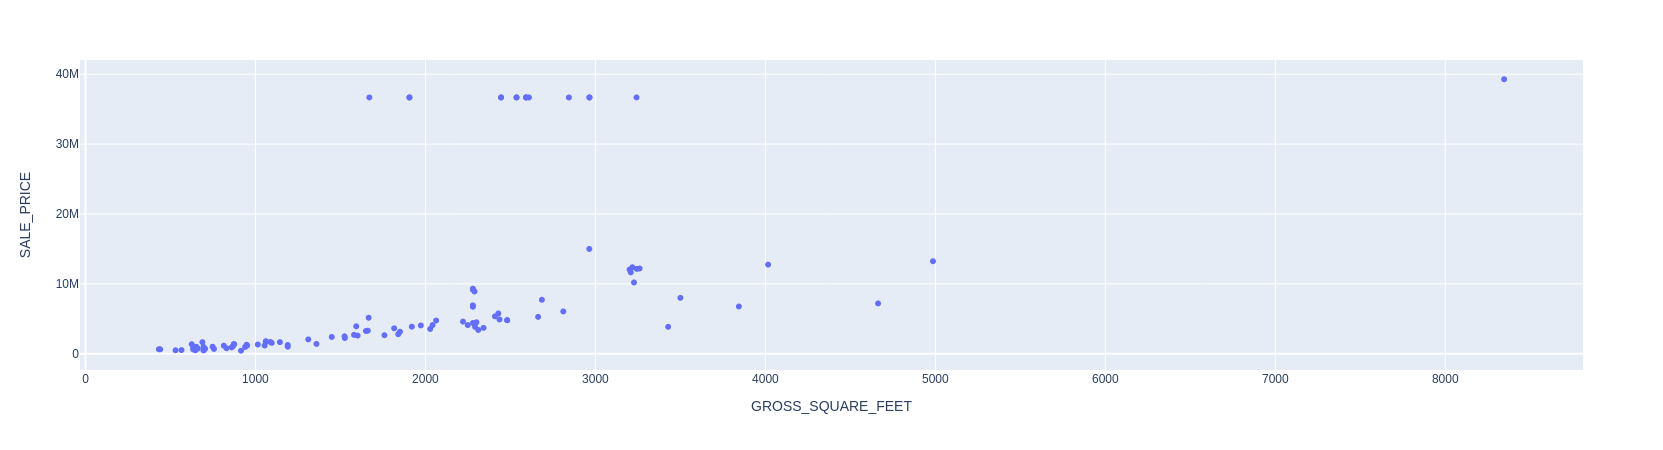

In [75]:
fig = px.scatter(tribeca_df, x="GROSS_SQUARE_FEET", y="SALE_PRICE")
iplot(fig)

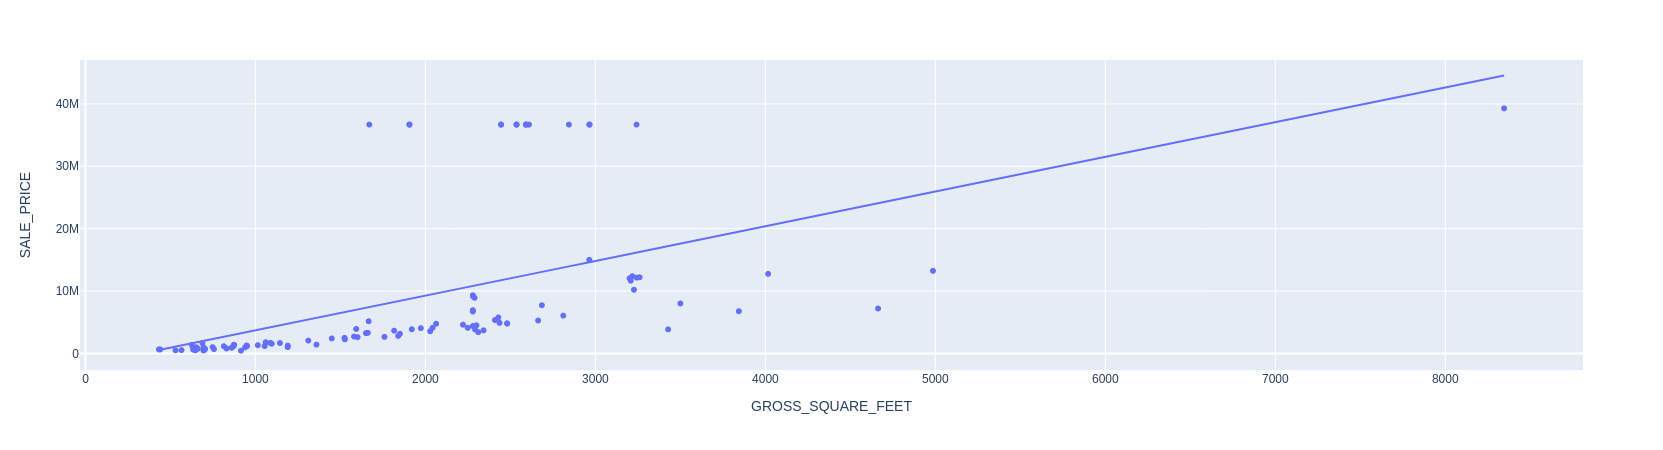

In [77]:
# Add an OLS (Ordinary Least Squares) trendline,
# to see how the outliers influence the "line of best fit"
fig = px.scatter(tribeca_df, x="GROSS_SQUARE_FEET", y="SALE_PRICE", trendline="ols")
iplot(fig)

In [81]:
# Look at sales for more than $35 million

# All are at 70 Vestry Street
# All but one have the same SALE_PRICE & SALE_DATE
# Was the SALE_PRICE for each? Or in total?
# Is this dirty data?

tribeca_df[tribeca_df["SALE_PRICE"] > 35000000]

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,...,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
8370,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,223,1105,NaN,R4,"70 VESTRY STREET, 3C",3C,...,1.0,0.0,1.0,0,1670.0,2016.0,2,R4,36681561,2019-02-12
8371,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,223,1123,NaN,R4,"70 VESTRY STREET, 6C",6C,...,1.0,0.0,1.0,0,1906.0,2016.0,2,R4,36681561,2019-02-12
8372,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,223,1124,NaN,R4,"70 VESTRY STREET, 6D",6D,...,1.0,0.0,1.0,0,2536.0,2016.0,2,R4,36681561,2019-02-12
8373,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,223,1125,NaN,R4,"70 VESTRY STREET, 6E",6E,...,1.0,0.0,1.0,0,2965.0,2016.0,2,R4,36681561,2019-02-12
8374,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,223,1126,NaN,R4,"70 VESTRY STREET, 6F",6F,...,1.0,0.0,1.0,0,2445.0,2016.0,2,R4,36681561,2019-02-12
8375,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,223,1127,NaN,R4,"70 VESTRY STREET, 7A",7A,...,1.0,0.0,1.0,0,2844.0,2016.0,2,R4,36681561,2019-02-12
8376,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,223,1128,NaN,R4,"70 VESTRY STREET, 7B",7B,...,1.0,0.0,1.0,0,3242.0,2016.0,2,R4,36681561,2019-02-12
8377,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,223,1129,NaN,R4,"70 VESTRY STREET, 7C",7C,...,1.0,0.0,1.0,0,1906.0,2016.0,2,R4,36681561,2019-02-12
8378,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,223,1130,NaN,R4,"70 VESTRY STREET, 7D",7D,...,1.0,0.0,1.0,0,2536.0,2016.0,2,R4,36681561,2019-02-12
8379,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,223,1131,NaN,R4,"70 VESTRY STREET, 7E",7E,...,1.0,0.0,1.0,0,2965.0,2016.0,2,R4,36681561,2019-02-12


In [ ]:
# I'd assume this is the price total.

In [82]:
# Make a judgment call:
# Keep rows where sale price was < $35 million

# Check how many rows you have now. (Should be down to 90 rows.)
tribeca_df = tribeca_df[tribeca_df["SALE_PRICE"] < 35000000]
tribeca_df.shape

(90, 21)

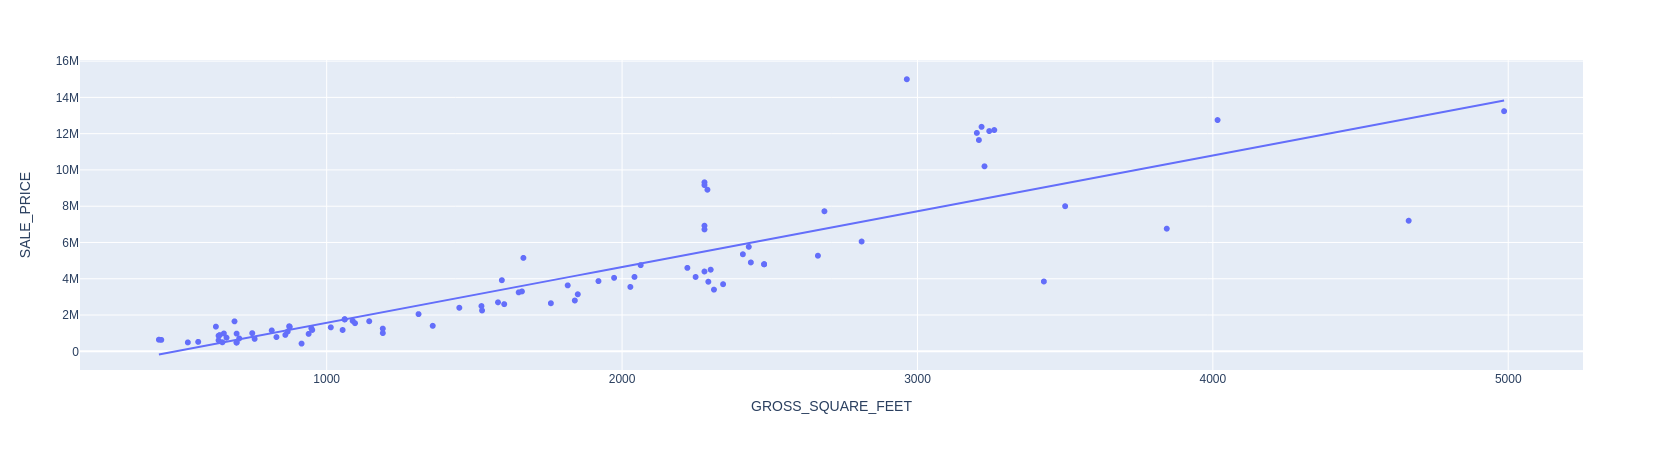

In [83]:
# Now that you've removed outliers,
# Look again at a scatter plot with OLS (Ordinary Least Squares) trendline
# Add an OLS (Ordinary Least Squares) trendline,
# to see how the outliers influence the "line of best fit"
fig = px.scatter(tribeca_df, x="GROSS_SQUARE_FEET", y="SALE_PRICE", trendline="ols")
iplot(fig)

In [86]:
# Select these columns, then write to a csv file named tribeca.csv. Don't include the index.
tribeca_df[["GROSS_SQUARE_FEET", "SALE_PRICE"]].to_csv("tribeca.csv", index=False)